## ABRIMOS EL DATASET

In [1]:
import pandas as pd

In [2]:
ls

 NIRSdata.csv                 ProyectoFinal-Objetivos.pdf
'Proyecto Final - IA.ipynb'   README.md


In [3]:

data = pd.read_csv('NIRSdata.csv', encoding='latin1')

/tmp/ipykernel_42404/1622662162.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21,22,23,25,26,27,28,29,30,31,32,35,36,37,38,39,42,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NIRSdata.csv', encoding='latin1')


In [4]:
data

,Unnamed: 0,CODIGO_MUESTRA,2X,Codigos,Codigo_de_muestra,Fecha_de_registro,Cultivo,Sistema_cultivo,Profundidad,Estado_cultivo,...,2414_5,2423,2431_5,2440,2448_5,2457,2465_5,2474,2482_5,2491
0,1,LQAS19-002703,NaN,LQAS19-002703,LQAS19-002703,4/06/2019 3:22 p. m.,Maracuya,No Indica,0 a 30 cm,Establecido,...,0.470079,0.474854,0.480904,0.487413,0.494017,0.500904,0.508063,0.514994,0.521809,0.527157
1,2,LQAS19-002703,NaN,LQAS19-002703,LQAS19-002703,4/06/2019 3:22 p. m.,Maracuya,No Indica,0 a 30 cm,Establecido,...,0.480973,0.485957,0.492129,0.498875,0.505900,0.513012,0.520427,0.527738,0.534733,0.540491
2,3,LQAS19-002704,NaN,LQAS19-002704,LQAS19-002704,4/06/2019 3:22 p. m.,Maracuya,No Indica,0 a 30 cm,Establecido,...,0.523511,0.528787,0.535298,0.542274,0.549406,0.556501,0.564125,0.571468,0.578451,0.584249
3,4,LQAS19-002704,NaN,LQAS19-002704,LQAS19-002704,4/06/2019 3:22 p. m.,Maracuya,No Indica,0 a 30 cm,Establecido,...,0.570260,0.575961,0.582749,0.590119,0.597509,0.605052,0.612833,0.620518,0.627860,0.633891
4,5,LQAS19-002705,NaN,LQAS19-002705,LQAS19-002705,4/06/2019 3:22 p. m.,Guanabana,Monocultivo,0 a 30 cm,Establecido,...,0.531322,0.535443,0.540683,0.546291,0.551770,0.557568,0.563411,0.569355,0.575130,0.579539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,6174,LQAS19-008827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6174,6175,LQAS19-008828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6175,6176,LQAS19-008829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6176,6177,LQAS19-008830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ANALISIS EXPLORATORIO DE LOS DATOS: ¿CÓMO Y QUÉ VIENE EN LOS DATOS?

El dataset esta codificado en español utilizando tildes y demás, esto causa problemas de lectura en los tipos de datos. 

Voy a separar las columnas de datos de absorbancia de las caracteristicas del suelo.

In [5]:
import numpy as np

In [6]:
soil_properties_columns = data.iloc[:, 0:50]
absorbance_columns = data.iloc[:, 50:]

In [7]:
absorbance_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Columns: 247 entries, 400 to 2491
dtypes: float64(247)
memory usage: 11.6 MB


In [8]:
absorbance_columns= absorbance_columns.interpolate(method='linear', limit_direction='both')

Podemos ver que el dataset de absorbancia desde 400nm hasta 2491nm son 247 columnas en total y 6178 filas. Todas ellas del tipo 'float64'. Podemos decir que este dataset esta decente por el momento, parece que el dateset esta completo y correcto, sin emabrgo eso lo verificaremos más adelante. 

Ahora para el dataset de caracteristicas del suelo:

In [9]:
soil_properties_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        6178 non-null   int64  
 1   CODIGO_MUESTRA                    6178 non-null   object 
 2   2X                                0 non-null      float64
 3   Codigos                           3673 non-null   object 
 4   Codigo_de_muestra                 3671 non-null   object 
 5   Fecha_de_registro                 3671 non-null   object 
 6   Cultivo                           3671 non-null   object 
 7   Sistema_cultivo                   3671 non-null   object 
 8   Profundidad                       3671 non-null   object 
 9   Estado_cultivo                    3671 non-null   object 
 10  Unidad_edad_cultivo               3671 non-null   object 
 11  Topografia                        3668 non-null   object 
 12  Drenaj

Acá podemos ver bien cada columna y que hace falta por arreglar  o limpiar.

- Quitaré las columnas que tienen '0 non-null' o que todas sus filas son NaN, Tabien quitare las columnas que tengan '<200 non-null'

Esto lo hago porqué al tener 6178 entradas , tener solo 200 filas YO lo considero que no es representativo de la población al ser ~3% del total de los datos únicamente para hacer inferencia del 97% restante.

- Eliminare las columnas que no presentan información , que son metadatos que no sirven para hacer inferencias

In [10]:
soil_properties_columns = soil_properties_columns.drop(columns=['2X','2y','OBSERVACIONES','CICA','humedad','textura','Arcilla','Arena','Limo'])
soil_properties_columns = soil_properties_columns.drop(columns=['id'])


El principal problema es que muchas columnas (MAgnesio, Hierro, Fosforo...) NO estan en tipo float64 sino en tipo object.
- Dividire el dataset de 'soil_properties_columns' entre propiedades y metadatos
- Iniciaré mirando algunas filas del dataset para determinar en cada columna el porqué de los valores Nulos si se debe a 'NaN' o se debe a casos de formato erroneo que contiene información.

In [11]:
selected_columns=['Unnamed: 0','CODIGO_MUESTRA','Codigos','Codigo_de_muestra','Fecha_de_registro','sampid_x','FECHA_DEL_SCAN','sampid_x','sampid_y']
metadata_soil = soil_properties_columns[selected_columns]
remaining_columns = [col for col in soil_properties_columns.columns if col not in selected_columns]
properties_soil = soil_properties_columns[remaining_columns]



In [12]:
metadata_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6178 non-null   int64 
 1   CODIGO_MUESTRA     6178 non-null   object
 2   Codigos            3673 non-null   object
 3   Codigo_de_muestra  3671 non-null   object
 4   Fecha_de_registro  3671 non-null   object
 5   sampid_x           6178 non-null   object
 6   FECHA_DEL_SCAN     3915 non-null   object
 7   sampid_x           6178 non-null   object
 8   sampid_y           6178 non-null   object
dtypes: int64(1), object(8)
memory usage: 434.5+ KB


In [13]:
properties_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cultivo                           3671 non-null   object 
 1   Sistema_cultivo                   3671 non-null   object 
 2   Profundidad                       3671 non-null   object 
 3   Estado_cultivo                    3671 non-null   object 
 4   Unidad_edad_cultivo               3671 non-null   object 
 5   Topografia                        3668 non-null   object 
 6   Drenaje                           3671 non-null   object 
 7   Riego                             3671 non-null   object 
 8   Prod_cultivo                      3671 non-null   object 
 9   Req_recomend_fertilizacion        3671 non-null   object 
 10  Departamento                      3671 non-null   object 
 11  Finca                             3640 non-null   object 
 12  Munici

In [14]:
unique_classes = properties_soil['Estado_cultivo'].unique()
print('Columna Estado_cultivo: ', unique_classes)

for column in properties_soil.columns:
    unique_classes = properties_soil[column].unique()
    print(f"Columna '{column}':")
    print(unique_classes)
    print()

Columna Estado_cultivo:  ['Establecido' 'Por establecer' nan 'No indica' '0']
Columna 'Cultivo':
['Maracuya' 'Guanabana' 'Cacao' 'Cania' 'Chontaduro' nan 'Maderable'
 'No Indica' 'Arroz' 'Cania Azucarera' 'Uva' 'Aji' 'Papaya' 'Aguacate'
 'Granadilla' 'Cafe' 'Maï¿½z' 'Limï¿½n' 'Tomate' 'Mango'
 'Hortalizas Varias' 'Piï¿½a' 'Naranja' 'Mandarina' 'Rambutan' '0'
 'Frutales Varios' 'Guayaba' 'Pasto' 'Cï¿½tricos' 'Palma de Aceite'
 'Berenjena' 'Kikuyo' 'Pasto Brachiaria' 'Sacha Inchi' 'Cania Panelera'
 'Papa' 'Plï¿½tano' 'Ajo' 'Lulo' 'Maï¿½z Forrajero' 'Melï¿½n' 'Sï¿½bila'
 'Uchuva' 'Maraï¿½ï¿½n' 'Pimienta' 'Pitahaya' 'Habichuela' 'Cannabis'
 'Fresa' 'Yuca' 'Alfalfa' 'Mora' 'Lechuga' 'Arveja' 'Rosa' 'Romero'
 'Zanahoria' 'Cilantro' 'Follajes' 'Patilla' 'Lima' 'Frijol' 'Ahuyama'
 'Mangostino' 'Caucho' 'Matarraton' 'Arï¿½ndano' 'Guadua' 'Gulupa'
 'Pasto Parï¿½' 'Soya' 'Banano' 'Tangelo' 'Menta' 'Higuerilla'
 'Pasto Angleton' 'Pasto Estrella' 'Cebolla de Rama' 'Batata' 'Trigo'
 'Fique' 'Silvopa

In [15]:
#NOS ENCARGAMOS DE LAS COLUMNAS DE TIPO 'float64'
import re

specific_columns=['pH','Materia_organica','CICE', 'Fosforo','Azufre','Acidez', 'Position','Boro','Aluminio', 'Calcio', 'Magnesio', 'Potasio', 'Sodio', 'Conductividad', 'Hierro', 'Cobre','Manganeso','Zinc']

for column in specific_columns:
    if properties_soil[column].dtype == 'object':
        properties_soil[column] = properties_soil[column].str.replace(r'^[<>]([\d.]+)', r'\1', regex=True)
        properties_soil[column] = properties_soil[column].replace('ND', np.nan)
        properties_soil[column]=properties_soil[column].astype(float)
        
properties_soil[specific_columns] = properties_soil[specific_columns].interpolate(method='linear', limit_direction='both')


/tmp/ipykernel_42404/3810821607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil[column] = properties_soil[column].str.replace(r'^[<>]([\d.]+)', r'\1', regex=True)
/tmp/ipykernel_42404/3810821607.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil[column] = properties_soil[column].replace('ND', np.nan)
/tmp/ipykernel_42404/3810821607.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [16]:
#NOS ENCARGAMOS DE LAS COLUMNAS DE TIPO 'object'

replacement_mapping = {np.nan: 'No indica', '0': 'No indica'}
properties_soil['Estado_cultivo'] = properties_soil['Estado_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', 'NO INDICA': 'No indica', 'No Indica': 'No indica'}
properties_soil['Sistema_cultivo'] = properties_soil['Sistema_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', '0_A_32': '0 a 32 cm', '0_A_33': '0 a 33 cm', '0_A_31': '0 a 31 cm'}
properties_soil['Profundidad'] = properties_soil['Profundidad'].replace(replacement_mapping)

replacement_mapping = {'Mese(s)': 'Meses', np.nan: 'No indica', '0': 'No indica'}
properties_soil['Unidad_edad_cultivo'] = properties_soil['Unidad_edad_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', 'NO INDICA': 'No indica', 'No Indica': 'No indica'}
properties_soil['Topografia'] = properties_soil['Topografia'].replace(replacement_mapping)
properties_soil['Drenaje'] = properties_soil['Drenaje'].replace(replacement_mapping)
properties_soil['Riego'] = properties_soil['Riego'].replace(replacement_mapping)
properties_soil['Prod_cultivo'] = properties_soil['Prod_cultivo'].replace(replacement_mapping)
properties_soil['Req_recomend_fertilizacion'] = properties_soil['Req_recomend_fertilizacion'].replace(replacement_mapping)
properties_soil['Departamento'] = properties_soil['Departamento'].replace(replacement_mapping)
properties_soil['Finca'] = properties_soil['Finca'].replace(replacement_mapping)
properties_soil['Municipio'] = properties_soil['Municipio'].replace(replacement_mapping)
properties_soil['Sample_Identification_String_One'] = properties_soil['Sample_Identification_String_One'].replace(replacement_mapping)
properties_soil['Cultivo'] = properties_soil['Cultivo'].replace(replacement_mapping)



/tmp/ipykernel_42404/3141349688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil['Estado_cultivo'] = properties_soil['Estado_cultivo'].replace(replacement_mapping)
/tmp/ipykernel_42404/3141349688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil['Sistema_cultivo'] = properties_soil['Sistema_cultivo'].replace(replacement_mapping)
/tmp/ipykernel_42404/3141349688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

LISTO¡ Como se observa a continuación hemos limpiado todo el dataset, hemos imputado los valores faltantes utilizando interpolación linear, y hemos completado los valores faltantes de los 'object' mapeando todo valor nan, '0' u erroneo por la clase por defecto 'No indica'. 

In [17]:
properties_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cultivo                           6178 non-null   object 
 1   Sistema_cultivo                   6178 non-null   object 
 2   Profundidad                       6178 non-null   object 
 3   Estado_cultivo                    6178 non-null   object 
 4   Unidad_edad_cultivo               6178 non-null   object 
 5   Topografia                        6178 non-null   object 
 6   Drenaje                           6178 non-null   object 
 7   Riego                             6178 non-null   object 
 8   Prod_cultivo                      6178 non-null   object 
 9   Req_recomend_fertilizacion        6178 non-null   object 
 10  Departamento                      6178 non-null   object 
 11  Finca                             6178 non-null   object 
 12  Munici

In [18]:
absorbance_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Columns: 247 entries, 400 to 2491
dtypes: float64(247)
memory usage: 11.6 MB


In [19]:
absorbance_columns.describe()

,400,408_5,417,425_5,434,442_5,451,459_5,468,476_5,...,2414_5,2423,2431_5,2440,2448_5,2457,2465_5,2474,2482_5,2491
count,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,...,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000,6178.000000
mean,0.937004,0.951470,1.123543,0.960439,0.960695,0.960538,0.960969,0.961450,0.960469,0.956447,...,0.433909,0.439847,0.446824,0.453318,0.544081,0.463481,0.468786,0.556281,0.479912,0.483626
std,0.120507,0.122128,12.990895,0.123744,0.123856,0.124291,0.125027,0.125921,0.126599,0.126703,...,0.109642,0.110062,0.110471,0.110860,6.725346,0.111960,0.112697,6.445326,0.114228,0.114923
min,0.667986,0.668662,0.664574,0.657025,0.647864,0.639220,0.632296,0.626672,0.621256,0.614781,...,0.255055,0.258954,0.263429,0.267126,0.269921,0.272543,0.275300,0.278301,0.281570,0.283341
25%,0.822932,0.835944,0.842789,0.846853,0.850545,0.853408,0.855611,0.856676,0.856179,0.853761,...,0.333150,0.338922,0.345850,0.352359,0.357499,0.362193,0.367251,0.372462,0.377727,0.380980
50%,0.922384,0.936968,0.942360,0.940481,0.935648,0.931042,0.928572,0.927129,0.924605,0.919120,...,0.421852,0.427171,0.433188,0.438619,0.442750,0.446803,0.451446,0.456017,0.460666,0.463817
75%,1.026523,1.042881,1.051188,1.053054,1.052688,1.051260,1.051426,1.052281,1.051732,1.046820,...,0.500249,0.506144,0.513369,0.519739,0.525487,0.531088,0.536922,0.542689,0.548329,0.552279
max,1.380827,1.400071,1022.000000,1.422024,1.429661,1.437315,1.443073,1.447349,1.449368,1.448834,...,1.134162,1.143471,1.153631,1.162170,529.000000,1.177089,1.185532,507.000000,1.204596,1.210281


## PRUEBAS DE NORMALIDAD EN LAS COLUMNAS

### DATASET: ABSORBANCIA

In [20]:
from scipy.stats import shapiro

# Iterar sobre las columnas del DataFrame
for column in absorbance_columns.columns:
    # Aplicar la prueba de normalidad de Shapiro-Wilk a cada columna
    statistic, p_value = shapiro(absorbance_columns[column])
    
    # Imprimir el nombre de la columna y el valor p
    print("Columna:", column)
    print("Valor p:", p_value)
    print("----------------------")


Columna: 400
Valor p: 0.0
----------------------
Columna: 408_5
Valor p: 0.0
----------------------
Columna: 417
Valor p: 0.0
----------------------
Columna: 425_5
Valor p: 0.0
----------------------
Columna: 434
Valor p: 0.0
----------------------
Columna: 442_5
Valor p: 0.0
----------------------
Columna: 451
Valor p: 0.0
----------------------
Columna: 459_5
Valor p: 0.0
----------------------
Columna: 468
Valor p: 0.0
----------------------
Columna: 476_5
Valor p: 0.0
----------------------
Columna: 485
Valor p: 0.0
----------------------
Columna: 493_5
Valor p: 0.0
----------------------
Columna: 502
Valor p: 0.0
----------------------
Columna: 510_5
Valor p: 0.0
----------------------
Columna: 519
Valor p: 0.0
----------------------
Columna: 527_5
Valor p: 0.0
----------------------
Columna: 536
Valor p: 0.0
----------------------
Columna: 544_5
Valor p: 0.0
----------------------
Columna: 553
Valor p: 0.0
----------------------
Columna: 561_5
Valor p: 0.0
----------------------


/home/kaliw/deepLearning/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0, 0.5, 'Cuantiles observados')

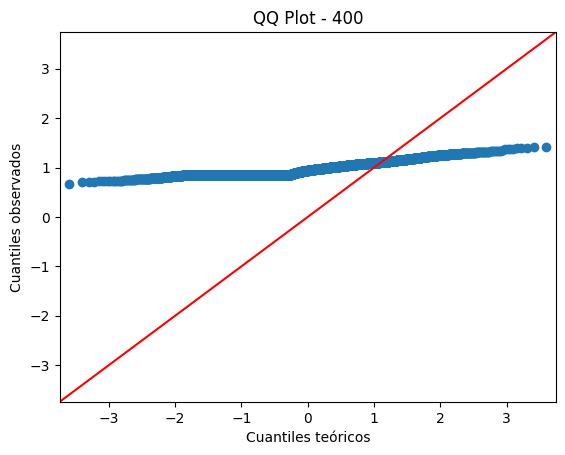

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

columna = absorbance_columns['425_5']

# Calcula los cuantiles teóricos para una distribución normal
quantiles = sm.ProbPlot(columna).theoretical_quantiles
# Genera el QQ plot
sm.qqplot(columna, line='45')
# Personaliza el gráfico
plt.title('QQ Plot - ' + '400')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')



Miraremos ahora la distribución de los datos.

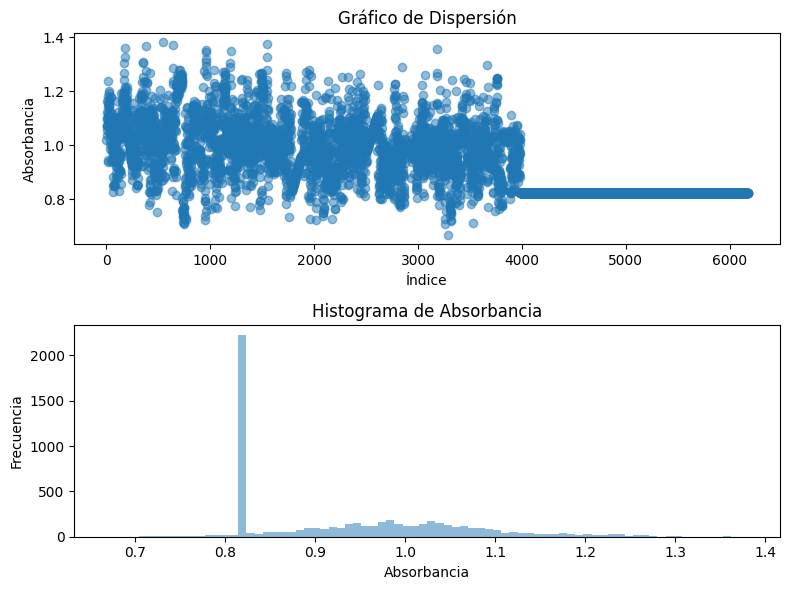

In [22]:
import math

columna_absorbancia = absorbance_columns['400']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Scatter plot
ax1.scatter(range(len(columna_absorbancia)), columna_absorbancia, alpha=0.5)
ax1.set_title('Gráfico de Dispersión')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Absorbancia')

# Histograma
ax2.hist(columna_absorbancia, bins=int(math.sqrt(len(columna_absorbancia))), alpha=0.5)
ax2.set_title('Histograma de Absorbancia')
ax2.set_xlabel('Absorbancia')
ax2.set_ylabel('Frecuencia')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


La prueba de Shapiro-Wilk da un p-value =1.0 que es >0.5 por lo tanto no hay suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal. Es deci, el resultado sugiere que los datos podrían provenir de una distribución normal. Pero,  al hacer un QQ-plot de los datos , visualmente se nota que no vienen de una distribución normal además un P-value de 1.0 es muy raro y muy alto. Sin embargo en el hsitograma vemos que tiene una distribución algo cercana a la distribución Normal


Es por esto que utilizaremos la ESTANDARIZACIÓN como técnica de normalización del dataset de Absorbancia.

In [23]:
from sklearn.preprocessing import StandardScaler

# Escalado estándar
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(absorbance_columns), columns=absorbance_columns.columns)


### DATASET: PROPEIDADES_DEL_SUELO

Primero observaremos las columnas de tipo 'object'. Las convertiremos a números utilizando la codificación 'ONE-HOT-ENCODING' 

In [24]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Recorre cada columna en el dataframe
for column in properties_soil.select_dtypes(include=['object']):
    # Realiza el Label Encoding en la columna actual
    encoded_values = label_encoder.fit_transform(properties_soil[column])
    # Reemplaza la columna original por los valores codificados
    properties_soil[column] = encoded_values


/tmp/ipykernel_42404/1110491433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil[column] = encoded_values
/tmp/ipykernel_42404/1110491433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_soil[column] = encoded_values
/tmp/ipykernel_42404/1110491433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [25]:
properties_soil.head()

,Cultivo,Sistema_cultivo,Profundidad,Estado_cultivo,Unidad_edad_cultivo,Topografia,Drenaje,Riego,Prod_cultivo,Req_recomend_fertilizacion,...,Sodio,CICE,Conductividad,Hierro,Cobre,Manganeso,Zinc,Boro,Position,Sample_Identification_String_One
0,53,4,4,0,2,7,0,3,0,2,...,0.14,18.52,0.21,29.17,6.30,1.00,1.00,0.49,41.0,1
1,53,4,4,0,2,7,0,3,0,2,...,0.14,18.52,0.21,29.17,6.30,1.00,1.00,0.49,1.0,1
2,53,4,4,0,2,7,0,3,0,2,...,0.16,25.43,0.27,9.82,3.52,1.00,1.00,0.74,42.0,1
3,53,4,4,0,2,7,0,3,0,2,...,0.16,25.43,0.27,9.82,3.52,1.00,1.00,0.74,2.0,1
4,38,3,4,0,0,7,0,3,0,2,...,0.17,18.58,0.50,30.57,3.42,1.53,3.18,0.43,43.0,1


In [26]:
# Iterar sobre las columnas del DataFrame
for column in properties_soil.columns:
    # Aplicar la prueba de normalidad de Shapiro-Wilk a cada columna
    statistic, p_value = shapiro(properties_soil[column])
    
    # Imprimir el nombre de la columna y el valor p
    print("Columna:", column)
    print("Valor p:", p_value)
    print("----------------------")

Columna: Cultivo
Valor p: 0.0
----------------------
Columna: Sistema_cultivo
Valor p: 0.0
----------------------
Columna: Profundidad
Valor p: 0.0
----------------------
Columna: Estado_cultivo
Valor p: 0.0
----------------------
Columna: Unidad_edad_cultivo
Valor p: 0.0
----------------------
Columna: Topografia
Valor p: 0.0
----------------------
Columna: Drenaje
Valor p: 0.0
----------------------
Columna: Riego
Valor p: 0.0
----------------------
Columna: Prod_cultivo
Valor p: 0.0
----------------------
Columna: Req_recomend_fertilizacion
Valor p: 0.0
----------------------
Columna: Departamento
Valor p: 0.0
----------------------
Columna: Finca
Valor p: 0.0
----------------------
Columna: Municipio
Valor p: 0.0
----------------------
Columna: pH
Valor p: 0.0
----------------------
Columna: Materia_organica
Valor p: 0.0
----------------------
Columna: Fosforo
Valor p: 0.0
----------------------
Columna: Azufre
Valor p: 0.0
----------------------
Columna: Acidez
Valor p: 0.0
------

/home/kaliw/deepLearning/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


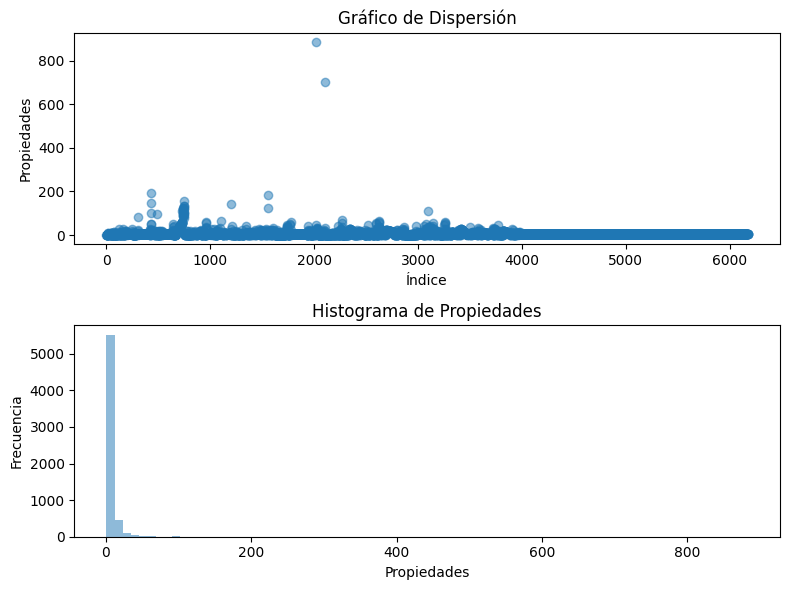

In [27]:

columan_properties = properties_soil['Manganeso']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Scatter plot
ax1.scatter(range(len(columan_properties)), columan_properties, alpha=0.5)
ax1.set_title('Gráfico de Dispersión')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Propiedades')

# Histograma
ax2.hist(columan_properties, bins=int(math.sqrt(len(columan_properties))), alpha=0.5)
ax2.set_title('Histograma de Propiedades')
ax2.set_xlabel('Propiedades')
ax2.set_ylabel('Frecuencia')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

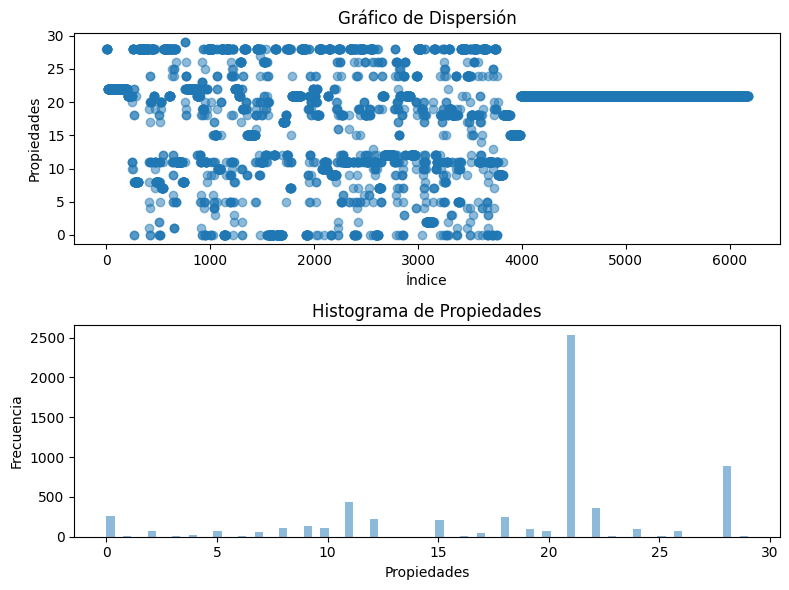

In [28]:

columan_properties = properties_soil['Departamento']

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Scatter plot
ax1.scatter(range(len(columan_properties)), columan_properties, alpha=0.5)
ax1.set_title('Gráfico de Dispersión')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Propiedades')

# Histograma
ax2.hist(columan_properties, bins=int(math.sqrt(len(columan_properties))), alpha=0.5)
ax2.set_title('Histograma de Propiedades')
ax2.set_xlabel('Propiedades')
ax2.set_ylabel('Frecuencia')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Definitivamente no hay NORMALIDAD en las propiedades del suelo, por lo que utilizaremos el escalizador MIN-MAX

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Escalado Min-Max
scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler.fit_transform(properties_soil), columns=properties_soil.columns)


## PCA

### DATAFRAME: ABSORBANCIA

In [30]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA sin especificar el número de componentes
pca = PCA()

# Ajustar PCA al dataframe
pca.fit(absorbance_columns)

# Obtener el vector de varianza explicada
variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(variance_ratio)

# Encontrar el número mínimo de componentes para el 95% de varianza explicada
min_components = np.argmax(cumulative_variance >= 0.99) + 1

print("Número mínimo de componentes:", min_components)

#OBTENER EL NUEVO DATAFRAME

pca = PCA(n_components=min_components)

absorbance = pca.fit_transform(absorbance_columns)

# Crear un nuevo DataFrame con el dataset reducido
absorbance = pd.DataFrame(absorbance)

# Verificar la forma del nuevo DataFrame reducido
print(absorbance.shape)




Número mínimo de componentes: 58
(6178, 58)


### DATAFRAME: PROPIEDADES

In [31]:
# Crear una instancia de PCA sin especificar el número de componentes
pca = PCA()

# Ajustar PCA al dataframe
pca.fit(properties_soil)

# Obtener el vector de varianza explicada
variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(variance_ratio)

# Encontrar el número mínimo de componentes para el 95% de varianza explicada
min_components = np.argmax(cumulative_variance >= 0.99) + 1

print("Número mínimo de componentes:", min_components)

#OBTENER EL NUEVO DATAFRAME

pca = PCA(n_components=min_components)

properties = pca.fit_transform(properties_soil)

# Crear un nuevo DataFrame con el dataset reducido
properties = pd.DataFrame(properties)

# Verificar la forma del nuevo DataFrame reducido
print(properties.shape)

Número mínimo de componentes: 4
(6178, 4)


A pesar de que se puede hacer PCA en el dataset de propiedades, considero que se reducen mucho las caracteristicas del suelo, que se son bien variadas pues incluye información sobre muchos minerales diferentes , así como muchos datos más, muchos de los cuales obiamente tendran cierta redundancia, pero por el momento CREO QUE ES CONVENIENTE USAR AMBOS DATAFRAME el que tiene PCA y el que no para las propiedaes. Para el dataset de Absorbancias si valió la pena usar PCA 

## LIMPIEZA DEL ALGORITMO ORIGINAL: CODIGO COMPLETO

In [32]:
# ELIMINAMOS COLUMNAS QUE NO PRESENTAN INFORMACION
to_drop=['2X','2y','OBSERVACIONES','CICA','humedad','textura','Arcilla','Arena','Limo','id', 'Unnamed: 0','CODIGO_MUESTRA','Codigos','Codigo_de_muestra','Fecha_de_registro','sampid_x','FECHA_DEL_SCAN','sampid_x','sampid_y']
data.drop(columns=to_drop, inplace=True)

#NOS ENCARGAMOS DE LAS COLUMNAS DE TIPO 'float64'

specific_columns=['pH','Materia_organica','CICE', 'Fosforo','Azufre','Acidez', 'Position','Boro','Aluminio', 'Calcio', 'Magnesio', 'Potasio', 'Sodio', 'Conductividad', 'Hierro', 'Cobre','Manganeso','Zinc']

for column in specific_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].str.replace(r'^[<>]([\d.]+)', r'\1', regex=True)
        data[column] = data[column].replace('ND', np.nan)
        data[column]=data[column].astype(float)
        
#NOS ENCARGAMOS DE LAS COLUMNAS DE TIPO 'object'

replacement_mapping = {np.nan: 'No indica', '0': 'No indica'}
data['Estado_cultivo'] = data['Estado_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', 'NO INDICA': 'No indica', 'No Indica': 'No indica'}
data['Sistema_cultivo'] = data['Sistema_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', '0_A_32': '0 a 32 cm', '0_A_33': '0 a 33 cm', '0_A_31': '0 a 31 cm'}
data['Profundidad'] = data['Profundidad'].replace(replacement_mapping)

replacement_mapping = {'Mese(s)': 'Meses', np.nan: 'No indica', '0': 'No indica'}
data['Unidad_edad_cultivo'] = data['Unidad_edad_cultivo'].replace(replacement_mapping)

replacement_mapping = {np.nan: 'No indica', '0': 'No indica', 'NO INDICA': 'No indica', 'No Indica': 'No indica'}
data['Topografia'] = data['Topografia'].replace(replacement_mapping)
data['Drenaje'] = data['Drenaje'].replace(replacement_mapping)
data['Riego'] = data['Riego'].replace(replacement_mapping)
data['Prod_cultivo'] = data['Prod_cultivo'].replace(replacement_mapping)
data['Req_recomend_fertilizacion'] = data['Req_recomend_fertilizacion'].replace(replacement_mapping)
data['Departamento'] = data['Departamento'].replace(replacement_mapping)
data['Finca'] = data['Finca'].replace(replacement_mapping)
data['Municipio'] = data['Municipio'].replace(replacement_mapping)
data['Sample_Identification_String_One'] = data['Sample_Identification_String_One'].replace(replacement_mapping)
data['Cultivo'] = data['Cultivo'].replace(replacement_mapping)

data_copy=data.copy()


# CODIFICAMOS LOS  DATOS CATEGORICOS
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']):
    encoded_values = label_encoder.fit_transform(data[column])
    data[column] = encoded_values
    
#INTERPOLAMOS DATOS FALTANTES
data = data.interpolate(method='linear', limit_direction='both')
    
    
# ESCALADO ESTANDAR
scaler = StandardScaler()
ac = data.iloc[:, 32:]
data[ac.columns] = scaler.fit_transform(data[ac.columns])

# Escalado Min-Max
scaler = MinMaxScaler()
pc = data.iloc[:, 0:31]
data[pc.columns] = scaler.fit_transform(data[pc.columns])

#PCA

pca=PCA()
pca.fit(data)
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)
min_components = np.argmax(cumulative_variance >= 0.99) + 1
print("Número mínimo de componentes:", min_components)
pca = PCA(n_components=min_components)
data_pca = pca.fit_transform(data)
data_pca= pd.DataFrame(data)


Número mínimo de componentes: 64


In [33]:
data_pca.head()

,Cultivo,Sistema_cultivo,Profundidad,Estado_cultivo,Unidad_edad_cultivo,Topografia,Drenaje,Riego,Prod_cultivo,Req_recomend_fertilizacion,...,2414_5,2423,2431_5,2440,2448_5,2457,2465_5,2474,2482_5,2491
0,0.546392,0.8,0.093023,0.0,0.666667,0.777778,0.0,0.333333,0.0,1.0,...,0.329921,0.318095,0.308522,0.307575,-0.007445,0.334274,0.348550,-0.006406,0.366810,0.378815
1,0.546392,0.8,0.093023,0.0,0.666667,0.777778,0.0,0.333333,0.0,1.0,...,0.429292,0.418985,0.410138,0.410968,-0.005678,0.442434,0.458266,-0.004429,0.479966,0.494850
2,0.546392,0.8,0.093023,0.0,0.666667,0.777778,0.0,0.333333,0.0,1.0,...,0.817300,0.808161,0.800939,0.802482,0.000792,0.830893,0.846048,0.002356,0.862721,0.875644
3,0.546392,0.8,0.093023,0.0,0.666667,0.777778,0.0,0.333333,0.0,1.0,...,1.243709,1.236806,1.230508,1.234091,0.007945,1.264574,1.278289,0.009967,1.295304,1.307633
4,0.391753,0.6,0.093023,0.0,0.000000,0.777778,0.0,0.333333,0.0,1.0,...,0.888543,0.868635,0.849693,0.838717,0.001143,0.840424,0.839714,0.002029,0.833641,0.834651


In [34]:
data_pca.shape

(6178, 279)

In [35]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Columns: 279 entries, Cultivo to 2491
dtypes: float64(278), int64(1)
memory usage: 13.2 MB


# MODELO DE MACHINE LEARNING: NO SUPERVISADO Y CLASIFICACIÓN 

### MODELO NO SUPERVISADO : CLUSTERS EN EL LOS DATOS DE ABSORBANCIA Y FERTILIZANTES

In [36]:
fertilizante_caracteristicas=['pH','Fosforo','Azufre','Acidez','Boro','Aluminio', 'Calcio', 'Magnesio', 'Potasio', 'Sodio', 'Conductividad', 'Hierro', 'Cobre','Manganeso','Zinc']


In [37]:
data_clusters= data_pca[fertilizante_caracteristicas]

pc = data_pca.iloc[:, 32:]

data_clusters = pd.concat([data_clusters, pc], axis=1)


In [38]:
data_clusters

,pH,Fosforo,Azufre,Acidez,Boro,Aluminio,Calcio,Magnesio,Potasio,Sodio,...,2414_5,2423,2431_5,2440,2448_5,2457,2465_5,2474,2482_5,2491
0,0.742004,0.018747,0.002540,0.057575,0.112644,0.047447,0.085851,0.261875,0.044732,0.000000,...,0.329921,0.318095,0.308522,0.307575,-0.007445,0.334274,0.348550,-0.006406,0.366810,0.378815
1,0.742004,0.018747,0.002540,0.057575,0.112644,0.047447,0.085851,0.261875,0.044732,0.000000,...,0.429292,0.418985,0.410138,0.410968,-0.005678,0.442434,0.458266,-0.004429,0.479966,0.494850
2,0.771855,0.016190,0.004398,0.057575,0.170115,0.047447,0.123659,0.358530,0.042966,0.001361,...,0.817300,0.808161,0.800939,0.802482,0.000792,0.830893,0.846048,0.002356,0.862721,0.875644
3,0.771855,0.016190,0.004398,0.057575,0.170115,0.047447,0.123659,0.358530,0.042966,0.001361,...,1.243709,1.236806,1.230508,1.234091,0.007945,1.264574,1.278289,0.009967,1.295304,1.307633
4,0.692964,0.013572,0.009033,0.057575,0.098851,0.047447,0.101453,0.196613,0.028252,0.002042,...,0.888543,0.868635,0.849693,0.838717,0.001143,0.840424,0.839714,0.002029,0.833641,0.834651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,0.449893,0.000265,0.006562,0.009800,0.039080,0.000000,0.038055,0.051632,0.004120,0.000000,...,-0.919054,-0.917056,-0.914104,-0.910764,-0.027745,-0.904750,-0.901034,-0.028522,-0.894645,-0.893249
6174,0.449893,0.000265,0.006562,0.009800,0.039080,0.000000,0.038055,0.051632,0.004120,0.000000,...,-0.919054,-0.917056,-0.914104,-0.910764,-0.027745,-0.904750,-0.901034,-0.028522,-0.894645,-0.893249
6175,0.449893,0.000265,0.006562,0.009800,0.039080,0.000000,0.038055,0.051632,0.004120,0.000000,...,-0.919054,-0.917056,-0.914104,-0.910764,-0.027745,-0.904750,-0.901034,-0.028522,-0.894645,-0.893249
6176,0.449893,0.000265,0.006562,0.009800,0.039080,0.000000,0.038055,0.051632,0.004120,0.000000,...,-0.919054,-0.917056,-0.914104,-0.910764,-0.027745,-0.904750,-0.901034,-0.028522,-0.894645,-0.893249


/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/

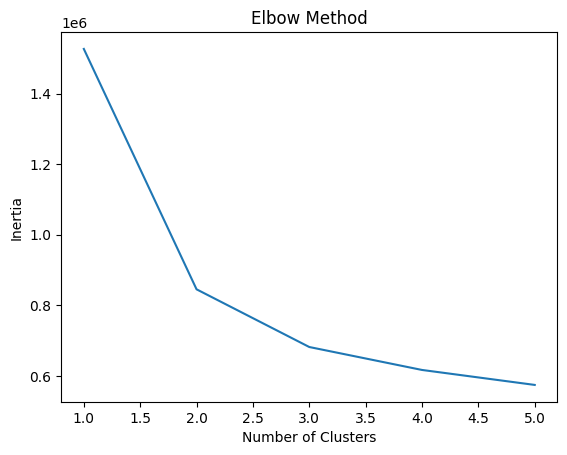

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clusters)  # Use your scaled DataFrame here
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [40]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 10)
silhouette_scores=[]

for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_clusters)
    
    # Calculate the silhouette coefficient
    silhouette_avg = silhouette_score(data_clusters, labels)
    silhouette_scores.append(silhouette_avg)
        
best_k = cluster_range[np.argmax(silhouette_scores)]
print('EL MEJOR K ENCONTRADO FUE: '+ str(best_k))

/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/kaliw/

EL MEJOR K ENCONTRADO FUE: 2


In [41]:
kmeans_MODELO1 = KMeans(n_clusters=2, random_state=42)
labels_MODELO1 = kmeans_MODELO1.fit_predict(data_clusters)

# Add the cluster labels to the DataFrame
data_clusters['Cluster'] = labels_MODELO1
data_pca['Cluster'] = labels_MODELO1

/home/kaliw/deepLearning/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### VISUALIZACIÓN DE CULTIVOS EN LOS CLUSTERS : CAFÉ, CACAO Y PASTO

Text(0.5, 1.0, 'Distribución del CAFÉ en los Clusters')

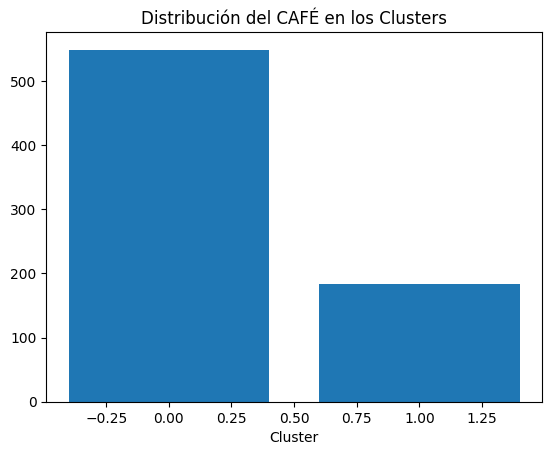

In [42]:
cafe=data_pca[data_pca['Cultivo'] == data_pca['Cultivo'][1177]] #CAFE
pasto=data_pca[data_pca['Cultivo'] == data_pca['Cultivo'][1232]] #PASTO
cacao=data_pca[data_pca['Cultivo'] == data_pca['Cultivo'][3477]] #CACAO

              
conteo_clusters = cafe['Cluster'].value_counts()
clusters = conteo_clusters.index
cultivo = conteo_clusters.values

plt.bar(clusters, cultivo)
plt.xlabel('Cluster')
plt.title('Distribución del CAFÉ en los Clusters')

Text(0.5, 1.0, 'Distribución del PASATO en los Clusters')

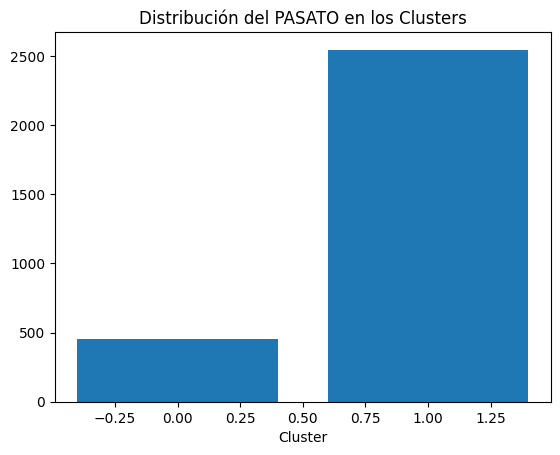

In [44]:
pasto=data_pca[data_pca['Cultivo'] == data_pca['Cultivo'][1232]] #PASTO
              
conteo_clusters = pasto['Cluster'].value_counts()
clusters = conteo_clusters.index
cultivo = conteo_clusters.values

plt.bar(clusters, cultivo)
plt.xlabel('Cluster')
plt.title('Distribución del PASATO en los Clusters')

Text(0.5, 1.0, 'Distribución del CACAO en los Clusters')

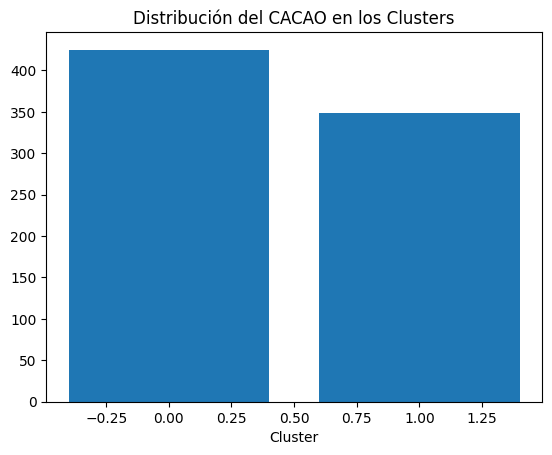

In [46]:
cacao=data_pca[data_pca['Cultivo'] == data_pca['Cultivo'][3477]] #CACAO
              
conteo_clusters = cacao['Cluster'].value_counts()
clusters = conteo_clusters.index
cultivo = conteo_clusters.values

plt.bar(clusters, cultivo)
plt.xlabel('Cluster')
plt.title('Distribución del CACAO en los Clusters')

### CLASIFICACIÓN EN LOS CÚLTIVOS DE CACAO PARA PREDECIR A QUE CLUSTER PERTENECE

In [63]:
X= data_pca.drop('Cluster', axis=1)
Y=data_pca['Cluster']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [69]:
len(X_train)

3706

In [70]:
len(X_val)

1236

In [71]:
len(X_test)

1236

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, matthews_corrcoef

# Splitting the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_val)

# Decision Trees
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_val)

# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_val)

# Perform k-fold cross-validation
k = 5  # Number of folds
logreg_cv_scores = cross_val_score(logreg, X_train, y_train, cv=k)
dtree_cv_scores = cross_val_score(dtree, X_train, y_train, cv=k)
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=k)

# Evaluate metrics on validation set
logreg_accuracy = accuracy_score(y_val, logreg_predictions)
logreg_mcc = matthews_corrcoef(y_val, logreg_predictions)

dtree_accuracy = accuracy_score(y_val, dtree_predictions)
dtree_mcc = matthews_corrcoef(y_val, dtree_predictions)

svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_mcc = matthews_corrcoef(y_val, svm_predictions)

# Print the evaluation metrics
print("Logistic Regression:")
print("Validation Accuracy:", logreg_accuracy)
print("Validation MCC:", logreg_mcc)
print("\nDecision Trees:")
print("Validation Accuracy:", dtree_accuracy)
print("Validation MCC:", dtree_mcc)
print("\nSupport Vector Machines (SVM):")
print("Validation Accuracy:", svm_accuracy)
print("Validation MCC:", svm_mcc)
print("\nAverage Cross-Validation Accuracy (Logistic Regression):", logreg_cv_scores.mean())
print("Average Cross-Validation Accuracy (Decision Trees):", dtree_cv_scores.mean())
print("Average Cross-Validation Accuracy (Support Vector Machines):", svm_cv_scores.mean())


Logistic Regression:
Validation Accuracy: 0.9983818770226537
Validation MCC: 0.9966244076292227

Decision Trees:
Validation Accuracy: 0.9700647249190939
Validation MCC: 0.9374130657735569

Support Vector Machines (SVM):
Validation Accuracy: 0.9943365695792881
Validation MCC: 0.988179217693462

Average Cross-Validation Accuracy (Logistic Regression): 0.9975715777106045
Average Cross-Validation Accuracy (Decision Trees): 0.9819228768583287
Average Cross-Validation Accuracy (Support Vector Machines): 0.991095299933433


In [72]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_val, logreg_predictions)

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[489   2]
 [  0 745]]


## CONCLUSIÓN

Finalmente, hemos concluido con el desarrollo del proyecto final de IA despues de analizar un dataset real sobre las propiedades del suelo y la absorbancia en diferentes longitudes de onda.

Mi idea inicial era entender los Fertiliantes que se aplican a los suelos, es decir yo quería analizar como las caracteristicas de pH, Al, Fe, Mg, Mn, Cu, B, y demas minerales influyen en la caracterización del suelo guiada por el tipo de cultivo y por la ubicación geogŕafica (Departamento). Es por esto que el análisis inicial realizado con aprendizaje No Supervisado con el algorirmo K-means utilizo las caracteristicas de interes antes mencionadas junto con la radiación de los diferentes longitudes de onda. El proyecto concluyo estudiando el comportamiento de los 2 clsuters que se generaron tras la busqueda. Se intentó explorar un poco los datos y ver relaciones intrinsecas de los clusteres. Finalmente se decidío realizar un clasificado binario con el fin de determinar para un tipo de cultivo específico que fue 'CACAO' a que cluster de los hallados previamente pertenecian.

Esto puede servir para comprender las caracteristicas del suelo que se relacionen con un cluster en particular y por eso identificar a que tipo de cluster pertenecen los cultivos es de gran utilidad para indagar y conocer más sobre las propiedades adecuadas de los suelos.